## 获得前n个成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
m = 100
n=2
X = np.empty((m,n))
X[:,0] = np.random.uniform(1.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. +np.random.normal(1.,10.,size=100)

In [20]:
def demean(X):
    return X - np.mean(X,axis=0)

In [21]:
np.mean(X,axis=0)

array([54.61113367, 44.32823233])

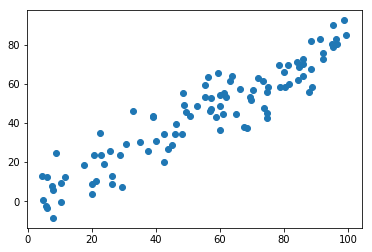

In [23]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [45]:
def f(w,X):
    return np.sum(X.dot(w) ** 2) / len(X)

def df(w,X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w/ np.linalg.norm(w)

def first_component(X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        last_w = w
        gradient = df(w,X)
        w = w + gradient * eta
        w = direction(w)
        
        if(abs(f(w,X) - f(last_w,X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

In [30]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X,initial_w,eta)

In [31]:
w

array([0.77286293, 0.63457299])

In [32]:
X2 = np.empty(X.shape)

In [33]:
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

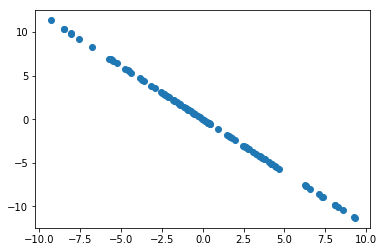

In [34]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [36]:
X2 = X - X.dot(w).reshape(-1,1) * w

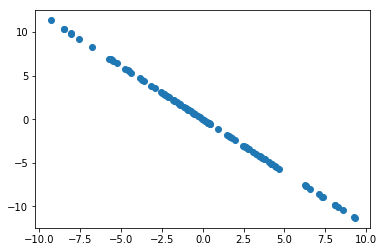

In [37]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [38]:
w2 = first_component(X2,initial_w,eta)
w2

array([-0.63456741,  0.77286752])

In [39]:
w.dot(w2)


7.220294010568118e-06

In [48]:
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [49]:
first_n_components(2,X)

[array([0.75875465, 0.65137652]), array([-0.65137051,  0.75875982])]